# TODO:
Mejorar para hacer el recorrido por los distintos modelos de forma automatica

Almacenar las predicciones para futuros ploteos o visualización de grafica


In [1]:
import numpy as np 
import matplotlib
matplotlib.use("TKAgg")
import matplotlib.pyplot as plt 

### graficos entrenamiento

In [2]:
num_epochs = 500
losses =np.load('stuff/entrenamiento_autoencoder_resized_v1.npz', allow_pickle = True)

In [1]:
# Ploteo de métricas de error y guarda imagenes 
l = int(len(losses['entrenamiento'])/num_epochs)
for i in range(0,l):
    plt.plot(losses["entrenamiento"][1+i*num_epochs:(i+1)*num_epochs-1], label="entrenamiento")
    plt.plot(losses["validación"][1+i*num_epochs:(i+1)*num_epochs-1], label="validación")
    plt.xlabel('Épocas')
    plt.ylabel('Error (MSE)')
    plt.title('Error entrenamiento #{} ID: 3'.format(i))
    plt.legend()
    #plt.savefig('entreamiento_{}_3.png'.format(i))
    plt.show()


NameError: name 'losses' is not defined

### Ploteo objetos 3D

In [1]:
import classification_nbv as cnbv
import os
import numpy as np
import torch
from torchvision import transforms, utils
from torch.utils.data import Dataset, DataLoader

from utils import net_sample_output
from voxnet_autoencoder import voxnet
from autoencoder import autoencoder

In [2]:
print("¿Esta el GPU disponible?:",torch.cuda.is_available())
device = torch.cuda.current_device()

/media/saulo/datos/Saulo/miniconda3/envs/pytorch/lib/python3.11/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


¿Esta el GPU disponible?: False


RuntimeError: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW

In [3]:
dataset_folder_val = 'archive/validation/'
# address
file_vol_val = 'dataset_vol_validation_resized_pytorch.npy'

# load the inputs
path_input_vol = os.path.join(dataset_folder_val, file_vol_val)
dataset_vol = np.load(path_input_vol)

print("Input validation data size: \n",dataset_vol.shape)

Input validation data size: 
 (3034, 29791)


In [4]:
batch_size = 1000
validation_dataset = cnbv.NBVClassificationDatasetFull(grid_file= dataset_folder_val +file_vol_val, 
                                    nbv_class_file= 'archive/validation/dataset_pose_validation.npy',
                                    transform=transforms.Compose([
                                    # Reshapes the plain grid
                                    cnbv.To3DGrid(),
                                    #Converts angle to rotation matrix
                                    cnbv.ToSO3(),
                                    #converts to tensors
                                    cnbv.ToTensor()
                                    ]))

validation_loader = DataLoader(validation_dataset, 
                          batch_size=batch_size,
                          #shuffle=True, 
                          num_workers=0)

# Reconstrucciones Voxnet 

<Figure size 640x480 with 0 Axes>

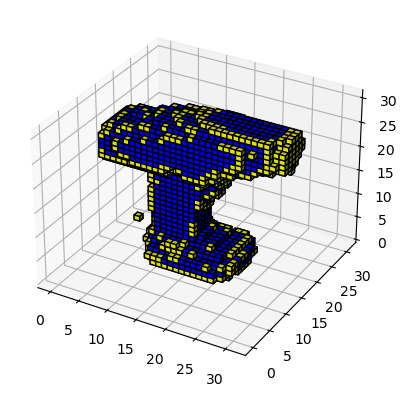

<Figure size 640x480 with 0 Axes>

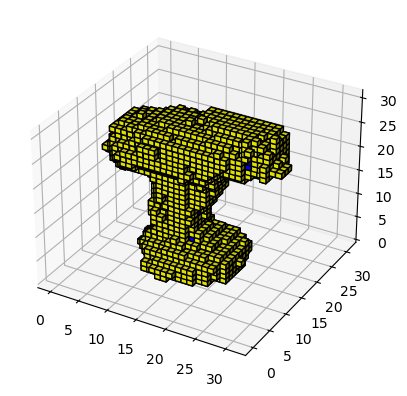

<Figure size 640x480 with 0 Axes>

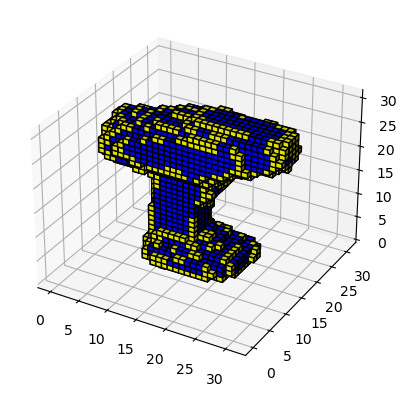

<Figure size 640x480 with 0 Axes>

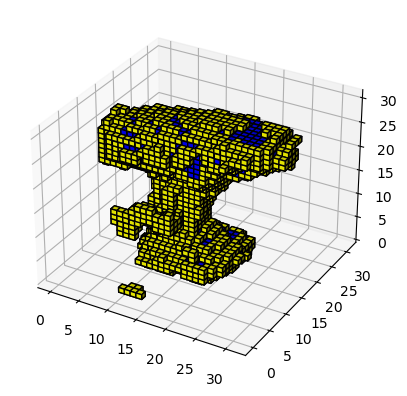

<Figure size 640x480 with 0 Axes>

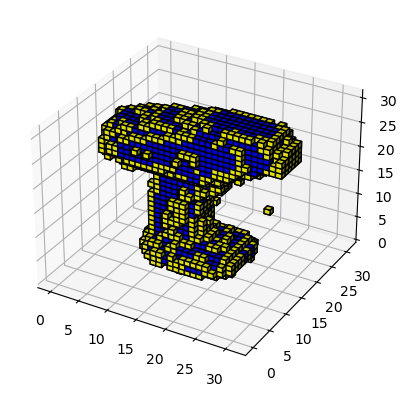

<Figure size 640x480 with 0 Axes>

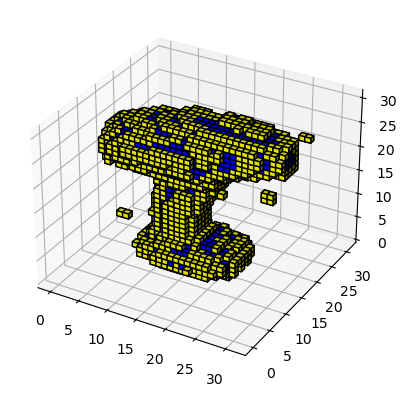

<Figure size 640x480 with 0 Axes>

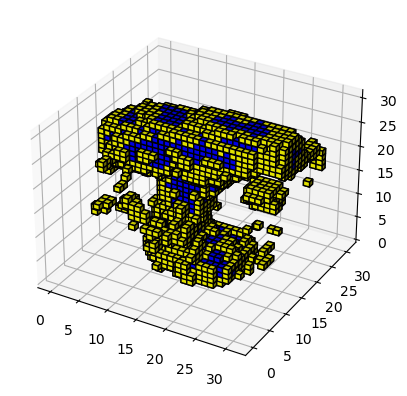

<Figure size 640x480 with 0 Axes>

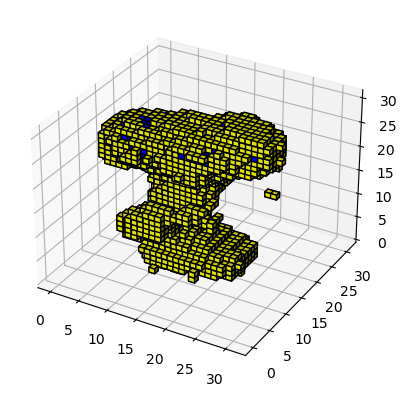

<Figure size 640x480 with 0 Axes>

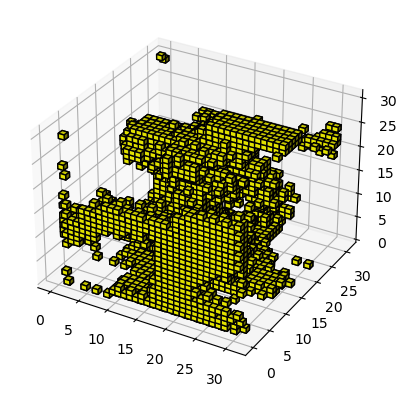

<Figure size 640x480 with 0 Axes>

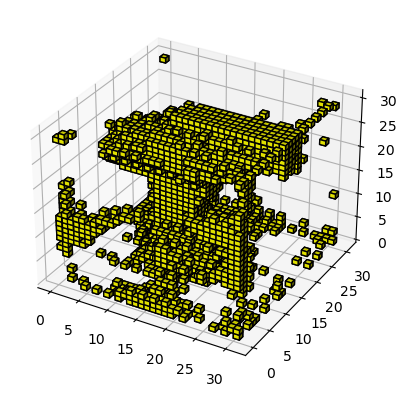

In [7]:
for i in [64,32,16,8,4]:
    for j in [2,4]:
        path_weights = 'stuff/experimento_2/weights_entrenamiento_autoenc_{}_{}.pth'.format(i,j)
        model= voxnet(latent_space = i).cuda()
        model.load_state_dict(torch.load(path_weights))
        _, output, _= net_sample_output(model, validation_loader, device)
        direction = 'img/entrenamiento/pred_{}_{}.png'.format(i,j)
        cnbv.showGrid(output[800,0].detach().numpy(),direction)
        np.save("voxnet_{}_{}.npy".format(i,j),output.detach().numpy(), allow_pickle=True)
        del output # Importante: Limpiar la memoria de CUDA pues corremos el riesgo de no poder iterar, se queda sin memoria :S
        del model
        torch.cuda.empty_cache()

# Reconstrucciones autoencoder

<Figure size 640x480 with 0 Axes>

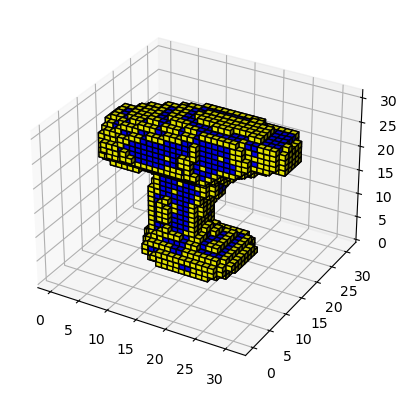

<Figure size 640x480 with 0 Axes>

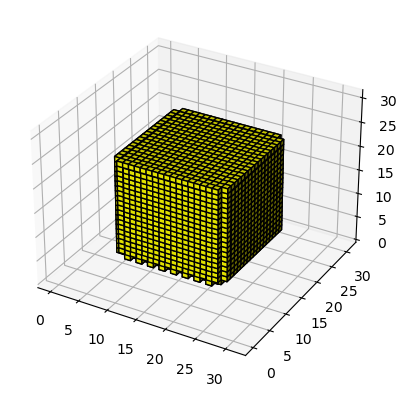

<Figure size 640x480 with 0 Axes>

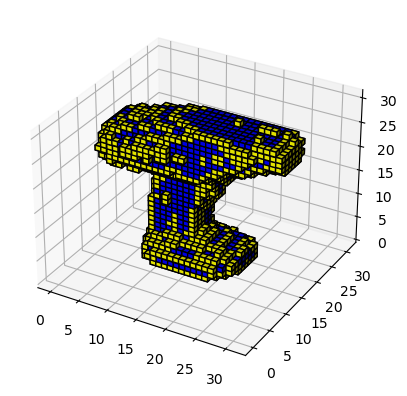

<Figure size 640x480 with 0 Axes>

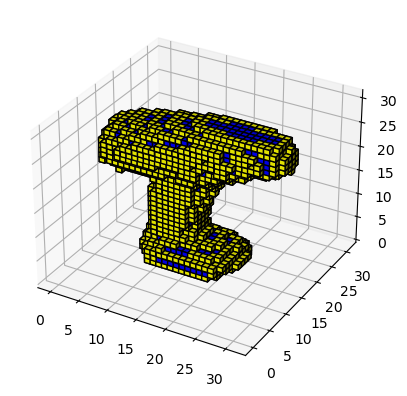

<Figure size 640x480 with 0 Axes>

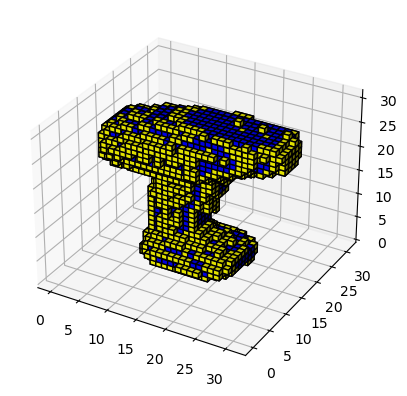

<Figure size 640x480 with 0 Axes>

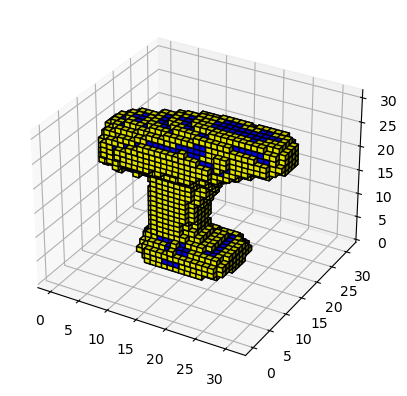

<Figure size 640x480 with 0 Axes>

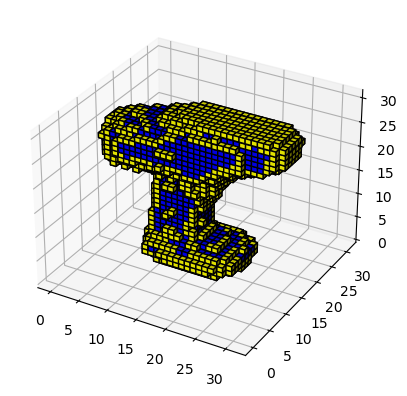

<Figure size 640x480 with 0 Axes>

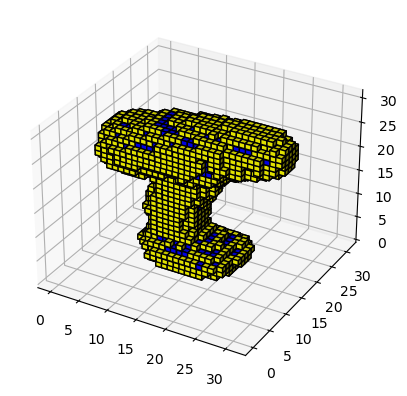

<Figure size 640x480 with 0 Axes>

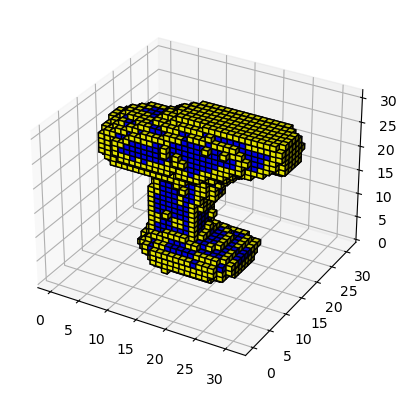

<Figure size 640x480 with 0 Axes>

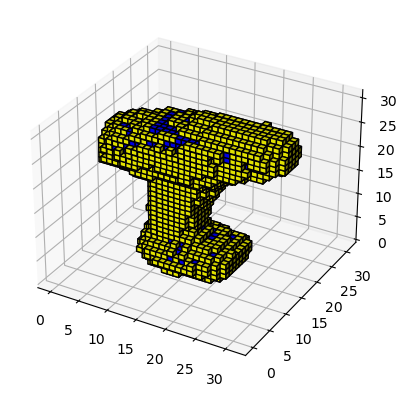

In [8]:
for i in [64,32,16,8,4]:
    for j in [1,3]:
        path_weights = 'stuff/experimento_2/weights_entrenamiento_autoenc_{}_{}.pth'.format(i,j)
        model= autoencoder(latent_space = i).cuda()
        model.load_state_dict(torch.load(path_weights))
        #torch.cuda.empty_cache()
        _, output, _= net_sample_output(model, validation_loader, device)
        direction = 'img/entrenamiento/pred_{}_{}.png'.format(i,j)
        cnbv.showGrid(output[800,0].detach().numpy(),direction)
        np.save("autoencoder_{}_{}.npy".format(i,j),output.detach().numpy(), allow_pickle=True)
        del output # Importante: Limpiar la memoria de CUDA pues corremos el riesgo de no poder iterar, se queda sin memoria :S
        del model
        torch.cuda.empty_cache()

# Plotear 3D con umbrales modificados

In [1]:
import classification_nbv as cnbv
import os
import numpy as np

<Figure size 640x480 with 0 Axes>

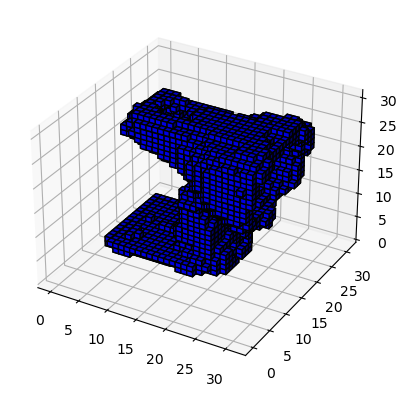

<Figure size 640x480 with 0 Axes>

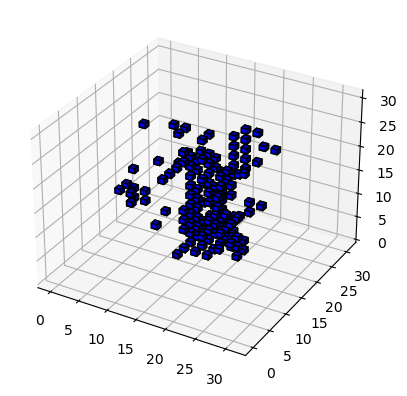

<Figure size 640x480 with 0 Axes>

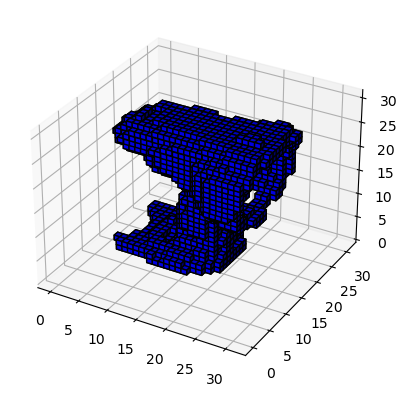

<Figure size 640x480 with 0 Axes>

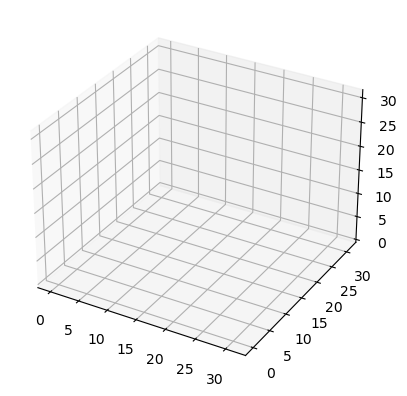

<Figure size 640x480 with 0 Axes>

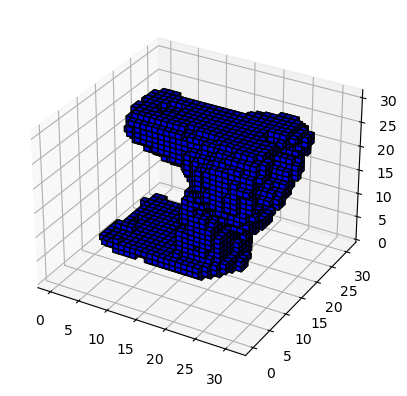

<Figure size 640x480 with 0 Axes>

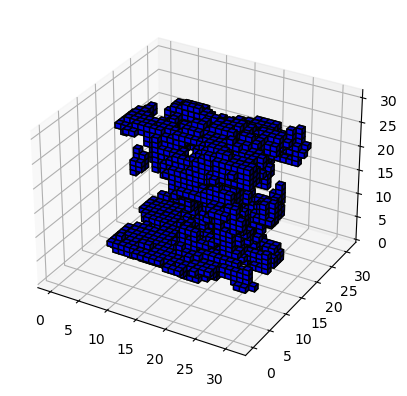

<Figure size 640x480 with 0 Axes>

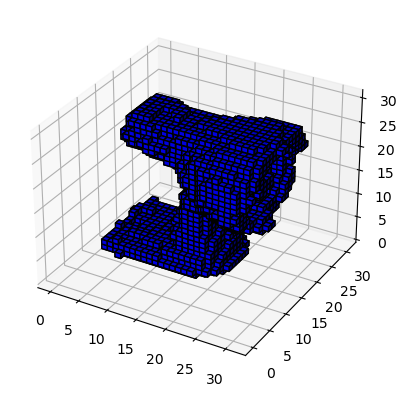

<Figure size 640x480 with 0 Axes>

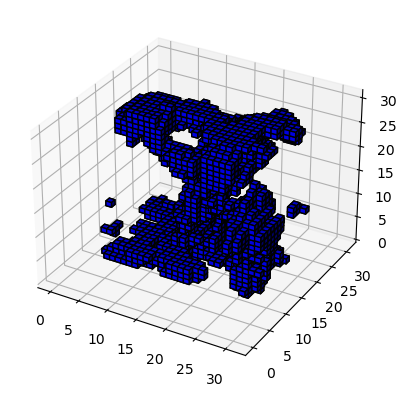

In [2]:
for i in [64,32,16,8,4]:
    for j in [1,2,3,4]:

        if j == 1 or j == 3:
            output = np.load('stuff/experimento_2/predicciones/autoencoder_{}_{}.npy'.format(i,j))
            direction_img = 'img/pred_{}_{}.png'.format(i,j)
            cnbv.showGrid(output[800,0],direction_img)
        
        else:
            output = np.load('stuff/experimento_2/predicciones/voxnet_{}_{}.npy'.format(i,j))
            direction_img = 'img/pred_{}_{}.png'.format(i,j)
            cnbv.showGrid(output[800,0],direction_img)

In [6]:
path_weights = 'stuff/experimento_2/weights_entrenamiento_autoenc_16_2.pth'
model= voxnet(latent_space = 16).cuda()
model.load_state_dict(torch.load(path_weights))
grid, output, _= net_sample_output(model, validation_loader, device)

/media/saulo/datos/Saulo/miniconda3/envs/pytorch/lib/python3.11/site-packages/torch/nn/modules/conv.py:605: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv3d(


In [39]:
direction_img = 'img/entrenamiento/800.png'
cnbv.showGrid(grid[900,0].detach().numpy(), direction_img)

NameError: name 'grid' is not defined

<Figure size 640x480 with 0 Axes>

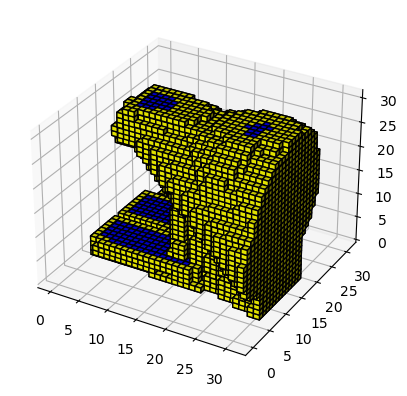

In [2]:
output = np.load('archive/validation/dataset_vol_validation_resized_pytorch.npy')
direction_img = 'img/comparativas/output_46.png'
#x = np.reshape(output[500],(1,32,32,32))
cnbv.showGrid(output[800],direction_img)

In [7]:
output.shape

(3034, 32768)

In [4]:
import matplotlib.pyplot as plt

In [5]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [1]:
import torch
import torch.nn as nn

class ESN(nn.Module):
    def __init__(self, input_size, reservoir_size, output_size):
        super(ESN, self).__init__()
        self.reservoir_size = reservoir_size
        self.W_in = nn.Linear(input_size, reservoir_size)
        self.W_res = nn.Linear(reservoir_size, reservoir_size)
        self.W_out = nn.Linear(reservoir_size, output_size)

    def forward(self, input):
        reservoir = torch.zeros((input.size(0), self.reservoir_size))
        for i in range(input.size(1)):
            input_t = input[:, i, :]
            reservoir = torch.tanh(self.W_in(input_t) + self.W_res(reservoir))
        output = self.W_out(reservoir)
        return output

# Example usage
input_size = 10
reservoir_size = 100
output_size = 1

model = ESN(input_size, reservoir_size, output_size)

In [4]:
model

TypeError: ESN.forward() missing 1 required positional argument: 'input'

In [3]:
import numpy as np

In [17]:
x = np.load('stuff/errores/entrenamiento_autoencoder_sliced.npz',allow_pickle= True)
y= np.load('stuff/errores/entrenamiento_voxcoder_sliced.npz',allow_pickle= True)
c= np.load('stuff/errores/entrenamiento_autoencoder_resized.npz',allow_pickle= True)
v= np.load('stuff/errores/entrenamiento_voxcoder_resized.npz',allow_pickle= True)

x1 = x['entrenamiento']
x2 = x['validación']
y1 = y['entrenamiento']
y2 = y['validación']
c1 = c['entrenamiento']
c2 = c['validación']
v1 = v['entrenamiento']
v2 = v['validación']

x_new = np.concatenate((x1,y1,c1,v1))
y_new = np.concatenate((x2,y2,c2,v2))
np.savez('stuff/errores/todos.npz', entrenamiento = x_new, validación = y_new, allow_pickle = True)

In [1]:
import numpy as np

In [10]:
def rotaciones_2D (a):
    return[[np.cos(a), -np.sin(a)], [np.sin(a), np.cos(a)]]

In [11]:
rotaciones_2D(2*np.pi)

[[1.0, 2.4492935982947064e-16], [-2.4492935982947064e-16, 1.0]]

In [53]:
a = np.linspace(0,2*np.pi,200)
x = []

In [54]:
for i in range (0, len(a)):
    x.append(rotaciones_2D(a[i]))

In [56]:
x[0]

[[1.0, -0.0], [0.0, 1.0]]

### MOdelo nuevo y paso de pesos

El nuevo modelo tiene la parte del codificador y decodificador separados
Se pasarón manualmente los pesos de cada una de las capas correspondientes de la arquitectura

y se importó este nuevo modelo a voxnet_coder_decoder.py

TODO: verificar a la salida del espacio latente se puedan tomar esos valores para alimentarlos al MLP

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from voxnet_autoencoder import voxnet
import classification_nbv as cnbv
from utils import net_sample_output

In [7]:
device = torch.cuda.current_device()

In [8]:
modelo_viejo = voxnet(latent_space= 16)
modelo_nuevo = VoxNetAutoencoder(latent_space = 16)

In [9]:
path_weights = 'stuff/experimento_2/weights_entrenamiento_autoenc_16_4.pth'
modelo_viejo.load_state_dict(torch.load(path_weights))

<All keys matched successfully>

In [10]:
modelo_nuevo.codificador.conv1.load_state_dict(modelo_viejo.conv1.state_dict())
modelo_nuevo.codificador.conv2.load_state_dict(modelo_viejo.conv2.state_dict())
modelo_nuevo.codificador.linear1.load_state_dict(modelo_viejo.linear1.state_dict())
modelo_nuevo.codificador.linear2.load_state_dict(modelo_viejo.linear2.state_dict())
modelo_nuevo.decodificador.linear3.load_state_dict(modelo_viejo.linear3.state_dict())
modelo_nuevo.decodificador.linear4.load_state_dict(modelo_viejo.linear4.state_dict())
modelo_nuevo.decodificador.tconv1.load_state_dict(modelo_viejo.tconv1.state_dict())
modelo_nuevo.decodificador.tconv2.load_state_dict(modelo_viejo.tconv2.state_dict())

<All keys matched successfully>

In [11]:
grid,output,_ = net_sample_output(modelo_nuevo.cuda(), validation_loader, device)

/media/saulo/datos/Saulo/miniconda3/envs/pytorch/lib/python3.11/site-packages/torch/nn/modules/conv.py:605: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv3d(


<Figure size 640x480 with 0 Axes>

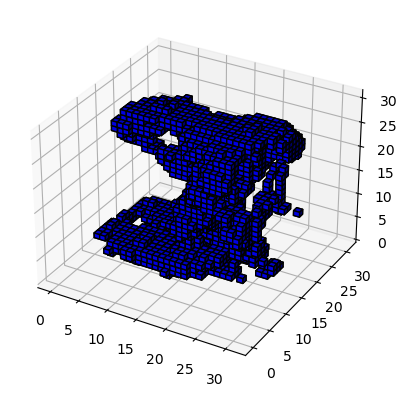

In [12]:
direction_img = 'prueba1.png'
cnbv.showGrid(output[800,0].detach().numpy(), direction_img)

<Figure size 640x480 with 0 Axes>

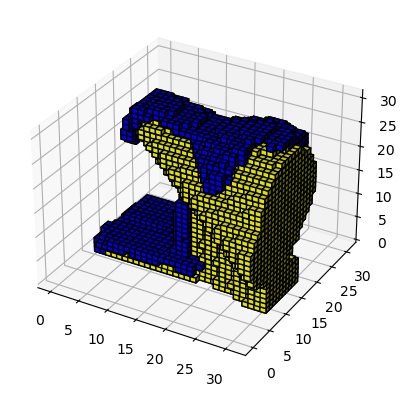

In [18]:
direction_img = 'prueba12.png'
cnbv.showGrid(grid[800,0].detach().numpy(), direction_img)

In [14]:
torch.save(modelo_nuevo.state_dict(), 'weights_nmodelo_vox_16_4.pth')

In [1]:
for i in ["xavier_uniform","xavier_normal"]:
    print(i)

xavier_uniform
xavier_normal


In [3]:
torch.nn.init.calculate_gain('relu')

1.4142135623730951

In [4]:
torch.nn.init.calculate_gain('tanh')

1.6666666666666667